In [1]:
import pandas as pd
import numpy as np

house_sales = pd.read_csv("C:\\Users\\Brittany\\Downloads\\MSPUS.csv")
#rename MSPUS to house_sales
house_sales.rename(columns = {'MSPUS':'HOUSE SALES'}, inplace = True)
print(house_sales)
#info of columns
print(house_sales.info())

           DATE  HOUSE SALES
0    1963-01-01      17800.0
1    1963-04-01      18000.0
2    1963-07-01      17900.0
3    1963-10-01      18500.0
4    1964-01-01      18500.0
..          ...          ...
237  2022-04-01     449300.0
238  2022-07-01     468000.0
239  2022-10-01     479500.0
240  2023-01-01     429000.0
241  2023-04-01     416100.0

[242 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         242 non-null    object 
 1   HOUSE SALES  242 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
None


In [2]:
income = pd.read_csv("C:\\Users\\Brittany\\Downloads\\MAFAINUSA646N.csv")
#rename MAFAINUSA646N to income
income.rename(columns = {'MAFAINUSA646N':"INCOME"}, inplace = True)
print(income)
#info of columns
print(income.info())

          DATE  INCOME
0   1953-01-01    4706
1   1954-01-01    4684
2   1955-01-01    4962
3   1956-01-01    5341
4   1957-01-01    5443
..         ...     ...
65  2018-01-01  106000
66  2019-01-01  116700
67  2020-01-01  115300
68  2021-01-01  121800
69  2022-01-01  126500

[70 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    70 non-null     object
 1   INCOME  70 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
None


In [3]:
inflation = pd.read_csv("C:\\Users\\Brittany\\Downloads\\FPCPITOTLZGUSA.csv")
#rename FPCPITOTLZGUSA to inflation rate
inflation.rename(columns = {'FPCPITOTLZGUSA':'INFLATION RATE'}, inplace = True)
print(inflation)
#info of columns
print(inflation.info())

          DATE  INFLATION RATE
0   1960-01-01        1.457976
1   1961-01-01        1.070724
2   1962-01-01        1.198773
3   1963-01-01        1.239669
4   1964-01-01        1.278912
..         ...             ...
58  2018-01-01        2.442583
59  2019-01-01        1.812210
60  2020-01-01        1.233584
61  2021-01-01        4.697859
62  2022-01-01        8.002800

[63 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            63 non-null     object 
 1   INFLATION RATE  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None


In [4]:
# Change date to datetime type

income['DATE'] = pd.to_datetime(income['DATE'])
house_sales['DATE'] = pd.to_datetime(house_sales['DATE'])
inflation['DATE'] = pd.to_datetime(inflation['DATE'])

In [5]:
# regroup dfs by year for consistency

house_sales['DATE'] = income['DATE'].dt.year
house_sales = house_sales.groupby('DATE')['HOUSE SALES'].mean().reset_index()
house_sales

,DATE,HOUSE SALES
0,1953.0,17800.0
1,1954.0,18000.0
2,1955.0,17900.0
3,1956.0,18500.0
4,1957.0,18500.0
...,...,...
65,2018.0,63100.0
66,2019.0,64700.0
67,2020.0,62600.0
68,2021.0,63700.0


In [6]:
income['DATE'] = income['DATE'].dt.year
income

,DATE,INCOME
0,1953,4706
1,1954,4684
2,1955,4962
3,1956,5341
4,1957,5443
...,...,...
65,2018,106000
66,2019,116700
67,2020,115300
68,2021,121800


In [7]:
inflation['DATE'] = inflation['DATE'].dt.year
inflation

,DATE,INFLATION RATE
0,1960,1.457976
1,1961,1.070724
2,1962,1.198773
3,1963,1.239669
4,1964,1.278912
...,...,...
58,2018,2.442583
59,2019,1.812210
60,2020,1.233584
61,2021,4.697859


In [8]:
# join dataframes into one

merged_df = pd.merge(income, house_sales, on='DATE', how = 'inner')
#merged_df

In [9]:
final_df = pd.merge(merged_df, inflation, on='DATE', how='inner')
final_df

,DATE,INCOME,HOUSE SALES,INFLATION RATE
0,1960,6227,19400.0,1.457976
1,1961,6471,20200.0,1.070724
2,1962,6670,19800.0,1.198773
3,1963,6998,20200.0,1.239669
4,1964,7336,20300.0,1.278912
...,...,...,...,...
58,2018,106000,63100.0,2.442583
59,2019,116700,64700.0,1.812210
60,2020,115300,62600.0,1.233584
61,2021,121800,63700.0,4.697859


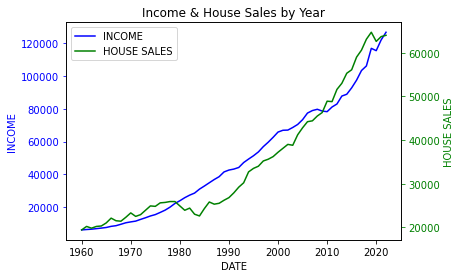

In [10]:
#line graph of income & house sales by year

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
x = final_df['DATE']
y1 = final_df['INCOME']
y2 = final_df['HOUSE SALES']
              
ax1.plot(x, y1, 'b-', label='INCOME')
ax1.set_xlabel('DATE')
ax1.set_ylabel('INCOME', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'g-', label='HOUSE SALES')
ax2.set_ylabel('HOUSE SALES', color='g')
ax2.tick_params('y', colors='g')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title("Income & House Sales by Year")
plt.show()

In [15]:
# new column to adjust column by inflation rate

final_df['ADJUST INCOME'] = final_df['INCOME'] * final_df['INFLATION RATE']
final_df['ADJUST INCOME'] = final_df['ADJUST INCOME'].round()
final_df

,DATE,INCOME,HOUSE SALES,INFLATION RATE,ADJUST INCOME
0,1960,6227,19400.0,1.457976,9079.0
1,1961,6471,20200.0,1.070724,6929.0
2,1962,6670,19800.0,1.198773,7996.0
3,1963,6998,20200.0,1.239669,8675.0
4,1964,7336,20300.0,1.278912,9382.0
...,...,...,...,...,...
58,2018,106000,63100.0,2.442583,258914.0
59,2019,116700,64700.0,1.812210,211485.0
60,2020,115300,62600.0,1.233584,142232.0
61,2021,121800,63700.0,4.697859,572199.0


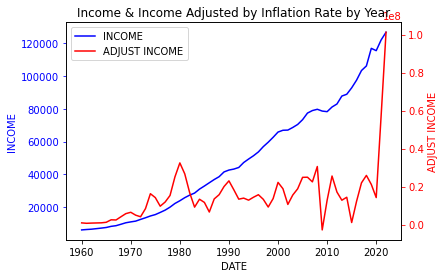

In [12]:
#line graph for income & adjusted income by year

fig, ax1 = plt.subplots()
x = final_df['DATE']
y1 = final_df['INCOME']
y2 = final_df['ADJUST INCOME']
              
ax1.plot(x, y1, 'b-', label='INCOME')
ax1.set_xlabel('DATE')
ax1.set_ylabel('INCOME', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', label='ADJUST INCOME')
ax2.set_ylabel('ADJUST INCOME', color='r')
ax2.tick_params('y', colors='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title("Income & Income Adjusted by Inflation Rate by Year")
plt.show()

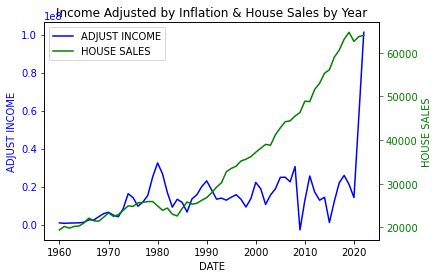

In [13]:
# line graph for adjusted income and house sales by year

fig, ax1 = plt.subplots()
x = final_df['DATE']
y1 = final_df['ADJUST INCOME']
y2 = final_df['HOUSE SALES']
              
ax1.plot(x, y1, 'b-', label='ADJUST INCOME')
ax1.set_xlabel('DATE')
ax1.set_ylabel('ADJUST INCOME', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'g-', label='HOUSE SALES')
ax2.set_ylabel('HOUSE SALES', color='g')
ax2.tick_params('y', colors='g')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title("Income Adjusted by Inflation & House Sales by Year")
plt.show()